## Tushar Goyal - B18030 - Tushar Goyal- CSE


## Dominant Color Extraction and  Image segmentation - Classification of an image into different groups

- __one of the most popular methods is K-Means clustering algorithm__
- __The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze__


K-Means clustering algorithm is an unsupervised algorithm and it is __used to segment the interest area from the background__. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.
The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

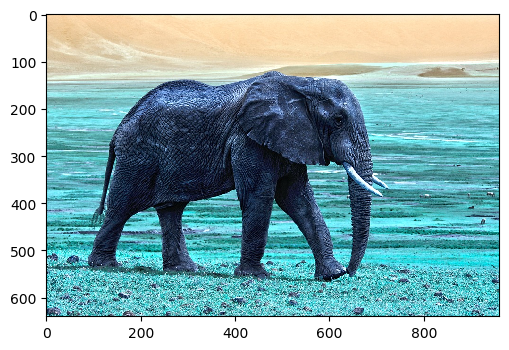

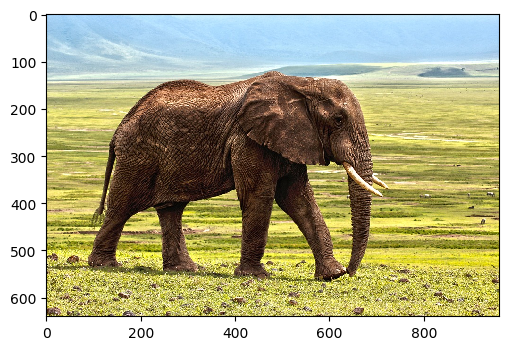

In [2]:
original_image = cv2.imread("elephant.jpg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
# cv2.imshow(img)
plt.figure(dpi=100)
plt.imshow(original_image)
plt.show()
plt.figure(dpi=100)
plt.imshow(img)
plt.show()


## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [3]:
original_shape=img.shape

In [4]:
original_shape

(640, 960, 3)

In [5]:
image = cv2.resize(img, (500,500))

Text(0.5, 1.0, 'Reshaped Original image to work on It')

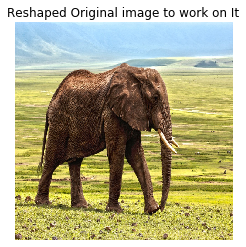

In [6]:
plt.axis('off')
plt.imshow(image)
plt.title('Reshaped Original image to work on It')
# plt.savefig('Reshaped_original_image.png')

In [7]:
shape_image=image.shape

In [8]:
shape_image

(500, 500, 3)

In [9]:
all_pixels=image.reshape((-1,3))
# 500*500=250000

In [10]:
all_pixels.shape

(250000, 3)

In [11]:
from sklearn.cluster import KMeans
dominant_colors = 4

kmean = KMeans(n_clusters=dominant_colors)
kmean.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
centers = kmean.cluster_centers_
# these center coordinates may also be in fraction so converting the datatype to integer, clearly the values will be from 0-255 so datatype uint8
centers = np.array(centers,dtype='uint8')
print(centers)

[[151 137  66]
 [ 62  41  25]
 [184 218 235]
 [215 205 112]]


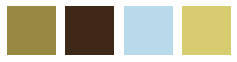

In [13]:
i = 1

plt.figure(0,figsize=(4,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting original image
__Concept__ -There are 3 features, R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image). And after the clustering, we apply centroid values (it is also R,G,B) to all pixels, such that resulting image will have specified number of colors. And again we need to reshape it back to the shape of original image. Below is the code:

In [14]:
new_img = np.zeros((500*500, 3),dtype='uint8')
print(new_img.shape)

(250000, 3)


In [15]:
colors

[array([151, 137,  66], dtype=uint8),
 array([62, 41, 25], dtype=uint8),
 array([184, 218, 235], dtype=uint8),
 array([215, 205, 112], dtype=uint8)]

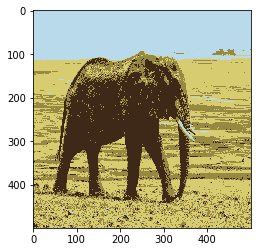

In [16]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmean.labels_[ix]]
    
new_img = new_img.reshape((shape_image))
plt.imshow(new_img)


In [17]:
def segmentimage(k):
    dominant_colors = k
    kmean = KMeans(n_clusters=dominant_colors)
    kmean.fit(all_pixels)
    centers = kmean.cluster_centers_
    centers = np.array(centers,dtype='uint8')
    colors = []
    i=0
    for each_col in centers:
        i+=1    
        colors.append(each_col)    

        
    new_img = np.zeros((500*500, 3),dtype='uint8')
    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[kmean.labels_[ix]]

    new_img = new_img.reshape((shape_image))
    plt.axis('off')
    plt.title(f'Segmented with{dominant_colors} dominant colors')
    plt.imshow(new_img)
#     plt.savefig(f'Segmented with{dominant_colors} dominant colors.png')

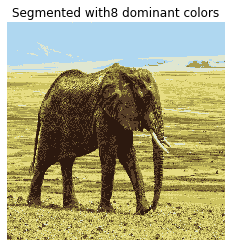

In [22]:
segmentimage(8)

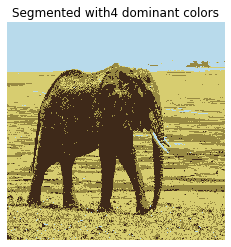

In [19]:
segmentimage(4)

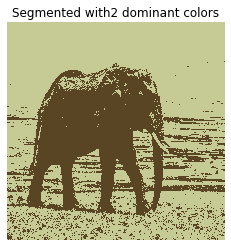

In [20]:
segmentimage(2)

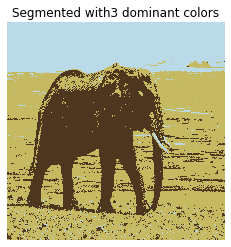

In [21]:
segmentimage(3)

## we can easily  remove elephant or sky as well by removing pixels with corresponding color id